In [1]:
#Importing the libraries

import numpy as np                      #for math calculations
import pandas as pd                     #for dataframe related functions
from copy import copy
import matplotlib.pyplot as plt         #for plotting graphs
from pandas import Series               #To work on Series
from datetime import datetime           #To access datetime
import datetime as dt
%matplotlib inline
import warnings                         #To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
#train=pd.read_csv("Train_SU63ISt.csv",parse_dates= [col],encoding='utf-8-sig', usecols= ['Datetime', 'ID'])
#test=pd.read_csv("Test_0qrQsBZ.csv",parse_dates= [col],encoding='utf-8-sig', usecols= ['Datetime', 'ID'])


In [3]:
#import the train and test files.

train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [4]:
#Create a copy of Train and Test files.

train_original=train.copy()
test_original=test.copy()

# Determine Hypothesis based on limited evidences.

    1.Traffic will increase as the years pass by
    2.Traffic will be high from May to October
    3.Traffic on weekdays will be more
    4.Traffic during the peak hours will be high

In [5]:
#determine the train shape.

print(train.head())
print(train.shape)

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
(18288, 3)


In [6]:
#determine the test shape.

print(test.head())
print(test.shape)

      ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00
(5112, 2)


In [7]:
#know the columns

train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [8]:
#Know the object types

train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

Feature Extraction

In [9]:
#Features to be extracted based on hypothesis.

train['Datetime']=pd.to_datetime(train.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')

test_original['Datetime']=pd.to_datetime(test_original.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,errors='coerce',format='%d-%m-%Y %H:%M')

Mapping with observed hypothesis factors:
    

In [10]:
#Splitting the datetime single column with multiple possible columns for complete data set

for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [11]:
#After split,to know what are the values for day of week.

train['day of Week']=train['Datetime'].dt.dayofweek 
temp=train['Datetime']
temp.head()

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [12]:
#creating a function to apply values.Assign the values accordingly.

def applyer(row):
    if row.dayofweek ==5 or row.dayofweek ==6:
        return 1
    else:
        return 0   

In [13]:
#Feature transformed into edible values.

temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2
temp2.tail()

18283    0
18284    0
18285    0
18286    0
18287    0
Name: Datetime, dtype: int64

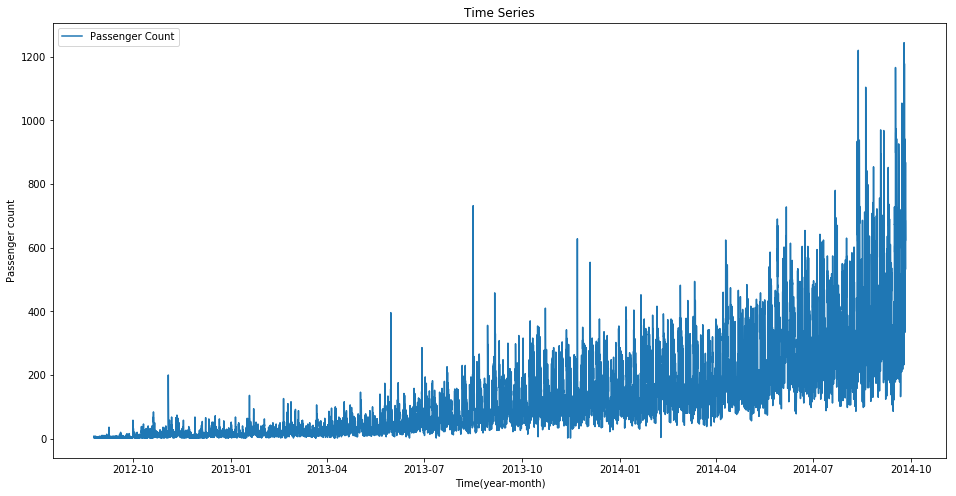

In [14]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

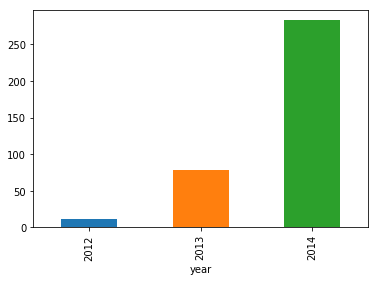

In [15]:
#Based on Hypothesis 1
train.groupby('year')['Count'].mean().plot.bar()

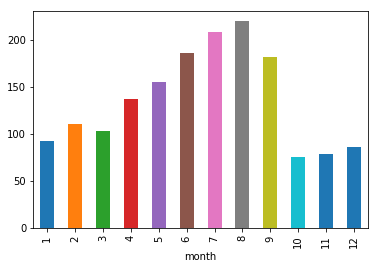

In [16]:
#Based on Hypothesis 2
train.groupby('month')['Count'].mean().plot.bar()

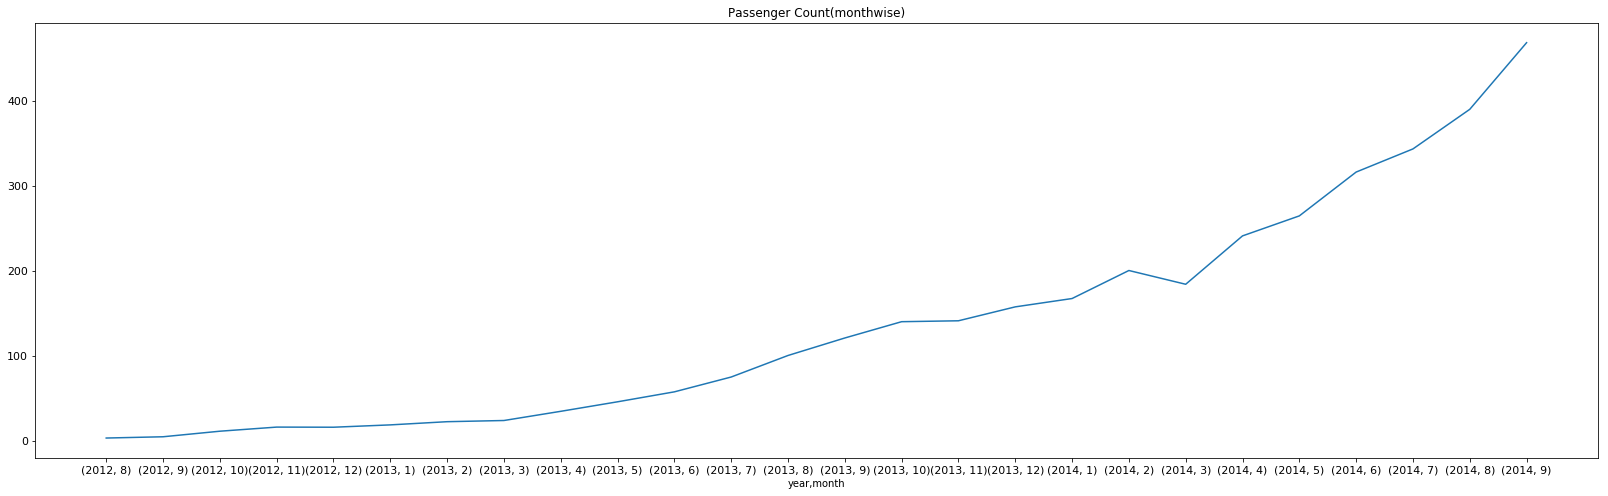

In [17]:
temp3=train.groupby(['year','month'])['Count'].mean()
#temp3.plot(figsize=(15,5),title='Passenger Count(monthwise)',fontsize=14)
temp3.plot(figsize=(28,8),title='Passenger Count(monthwise)',fontsize=11,xticks=(np.arange(len(temp3))))

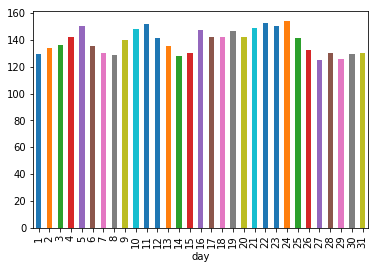

In [18]:
#Daily mean of passenger count.
train.groupby('day')['Count'].mean().plot.bar()

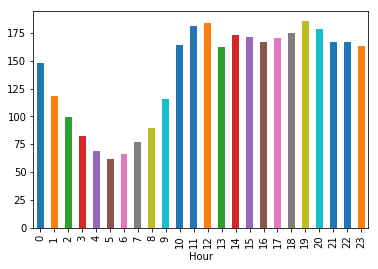

In [19]:
#Based on Hypothesis 4
train.groupby('Hour')['Count'].mean().plot.bar()

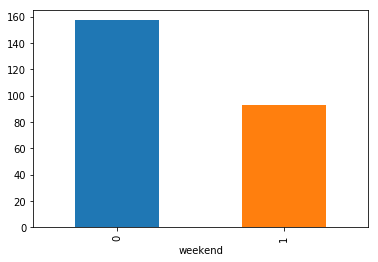

In [20]:
#Based on Hypothesis 3
train.groupby('weekend')['Count'].mean().plot.bar()

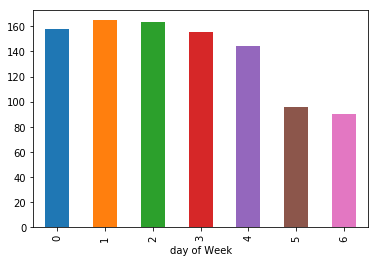

In [21]:
#day wise passenger count.
#0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.
train.groupby('day of Week')['Count'].mean().plot.bar()

In [22]:
#Before droping Column ID
print(train.columns)

train=train.drop('ID',1)

#After droping Column ID
print(train.columns)

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'Hour',
       'day of Week', 'weekend'],
      dtype='object')
Index(['Datetime', 'Count', 'year', 'month', 'day', 'Hour', 'day of Week',
       'weekend'],
      dtype='object')


# Make the Model learn

In [23]:
train.Timestamp=pd.to_datetime(train['Datetime'],format ='%d-%m-%y %H:%M')


In [24]:
train.head()

,Datetime,Count,year,month,day,Hour,day of Week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [25]:
train.index = train.Timestamp 

In [26]:
train.head()

,Datetime,Count,year,month,day,Hour,day of Week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Now we can see noise in Hourly basis Trend of Passenger count.So we need to make the aggregate of hourly time series to daily,weekly,monthly to make it more stable,so that model can learn.

In [27]:
# Hourly time series 
hourly = train.resample('H').mean()
#determine daily mean
daily = train.resample('D').mean()
#determine daily mean
weekly = train.resample('W').mean()
#determine monthly mean
monthly = train.resample('M').mean()
#determine Quarterly-month mean
quarterly_month = train.resample('Q').mean() 


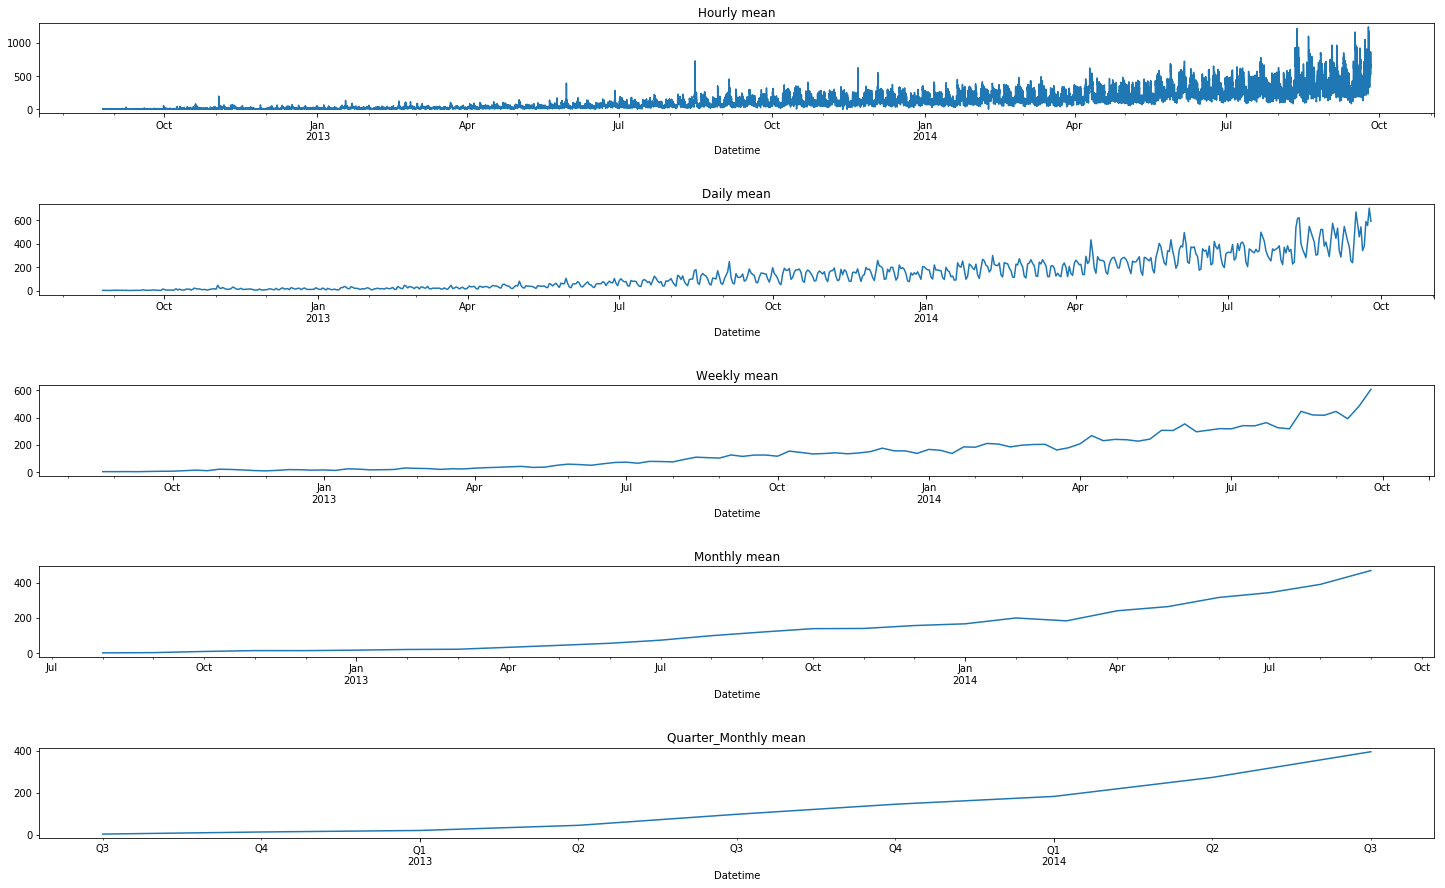

In [28]:
fig,axs=plt.subplots(5,1)
fig.subplots_adjust(hspace=1)
hourly.Count.plot(figsize=(25,15),title='Hourly mean',fontsize=10,ax=axs[0])
daily.Count.plot(figsize=(25,15),title='Daily mean',fontsize=10,ax=axs[1])
weekly.Count.plot(figsize=(25,15),title='Weekly mean',fontsize=10,ax=axs[2])
monthly.Count.plot(figsize=(25,15),title='Monthly mean',fontsize=10,ax=axs[3])
quarterly_month.Count.plot(figsize=(25,15),title='Quarter_Monthly mean',fontsize=10,ax=axs[4])


# Split Train,Validation set

We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data

In [29]:
Train_set=train.ix['2012-8-25':'2014-6-24']
Validation_set=train.ix['2014-6-25':'2014-9-25']
print(Train_set.head())
print(Validation_set.head())

                               Datetime  Count  year  month  day  Hour  \
Datetime                                                                 
2012-08-25 00:00:00 2012-08-25 00:00:00      8  2012      8   25     0   
2012-08-25 01:00:00 2012-08-25 01:00:00      2  2012      8   25     1   
2012-08-25 02:00:00 2012-08-25 02:00:00      6  2012      8   25     2   
2012-08-25 03:00:00 2012-08-25 03:00:00      2  2012      8   25     3   
2012-08-25 04:00:00 2012-08-25 04:00:00      2  2012      8   25     4   

                     day of Week  weekend  
Datetime                                   
2012-08-25 00:00:00            5        1  
2012-08-25 01:00:00            5        1  
2012-08-25 02:00:00            5        1  
2012-08-25 03:00:00            5        1  
2012-08-25 04:00:00            5        1  
                               Datetime  Count  year  month  day  Hour  \
Datetime                                                                 
2014-06-25 00:00:00 2014-

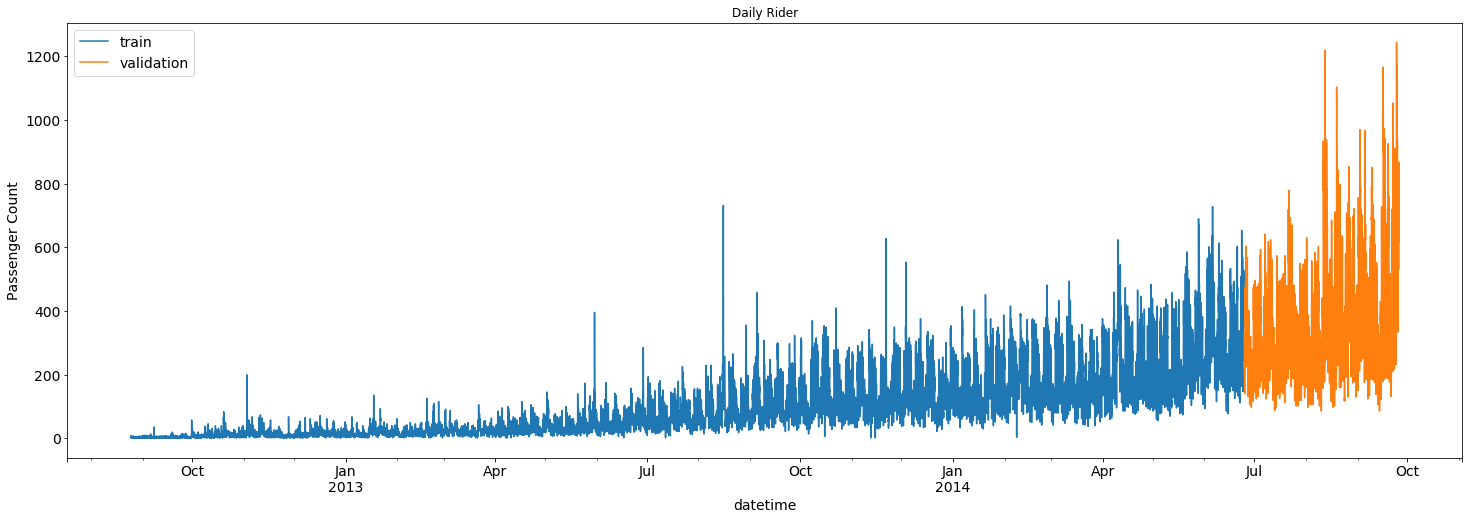

In [30]:
Train_set.Count.plot(figsize=(25,8),title='Daily Rider',fontsize=14,label='train')
Validation_set.Count.plot(figsize=(25,8),title='Daily Rider',fontsize=14,label='validation')
plt.xlabel('datetime',fontsize=14)
plt.ylabel('Passenger Count',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()

# Naive Approach 

In naive bayes, we use the previous values. So, tmp will store all the count. Whereas [len(tmp) - 1] will give us the previous values corresponding to that particular value.




Train.Count is converted into numpy array and stored in tmp,since we are using previous values. 
tmp[len(tmp)-1] will take last element from this array.
We are creating a column called "naive" in y_hat and assigning last element of this array to this column for all records in y_hat. 
So plotting a graph with same value in "Y" axis will give us horizontal line.


Datetime
2014-09-25 19:00:00    390
2014-09-25 20:00:00    390
2014-09-25 21:00:00    390
2014-09-25 22:00:00    390
2014-09-25 23:00:00    390
Name: naive, dtype: int64


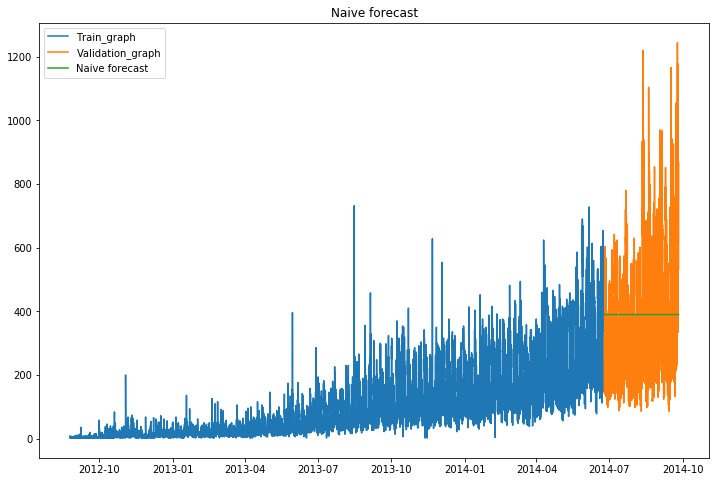

In [31]:
tmp = np.asarray(Train_set.Count)
y_hat = Validation_set.copy()
y_hat['naive'] = tmp[len(tmp)-1]
print(y_hat['naive'].tail())
plt.figure(figsize = (12,8))
plt.plot(Train_set.index,Train_set.Count,label = 'Train_graph')
plt.plot(Validation_set.index,Validation_set.Count,label = 'Validation_graph')
plt.plot(y_hat.index,y_hat['naive'],label = 'Naive forecast')
plt.legend(loc = 'best',fontsize = 10)
plt.title('Naive forecast')
plt.show()



# Calculate RMSE since its our evaluation metrics:

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Validation_set.Count,y_hat.naive))
print(rms)

186.37368520699056


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

# Moving Average Approach

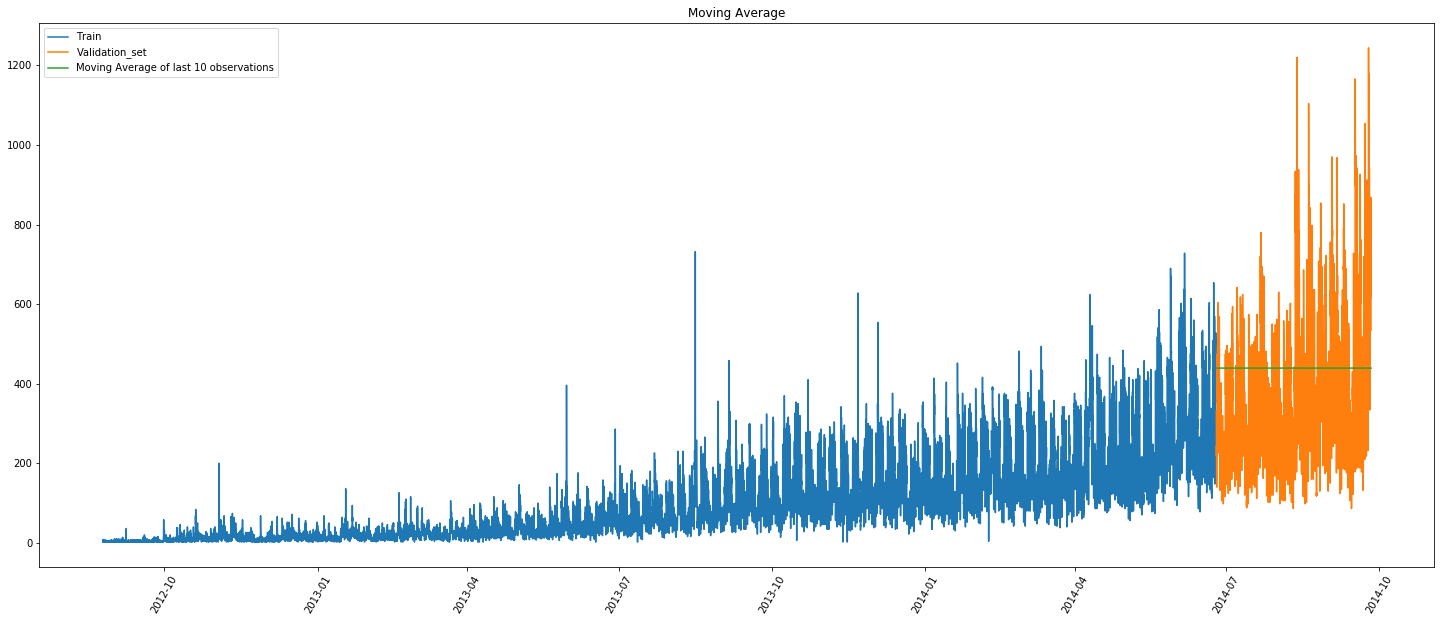

192.93805680435588

In [37]:
y_hat_avg = Validation_set.copy()

#Average of last 10 observations.
y_hat_avg['Moving Average of last 10 observations'] = Train_set.Count.rolling(10).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation_set')
plt.plot(y_hat_avg['Moving Average of last 10 observations'],label = 'Moving Average of last 10 observations')
plt.legend(loc = 'best')
plt.xticks(rotation=60)
plt.title('Moving Average')
plt.show()

rms1 = sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 10 observations']))
rms1


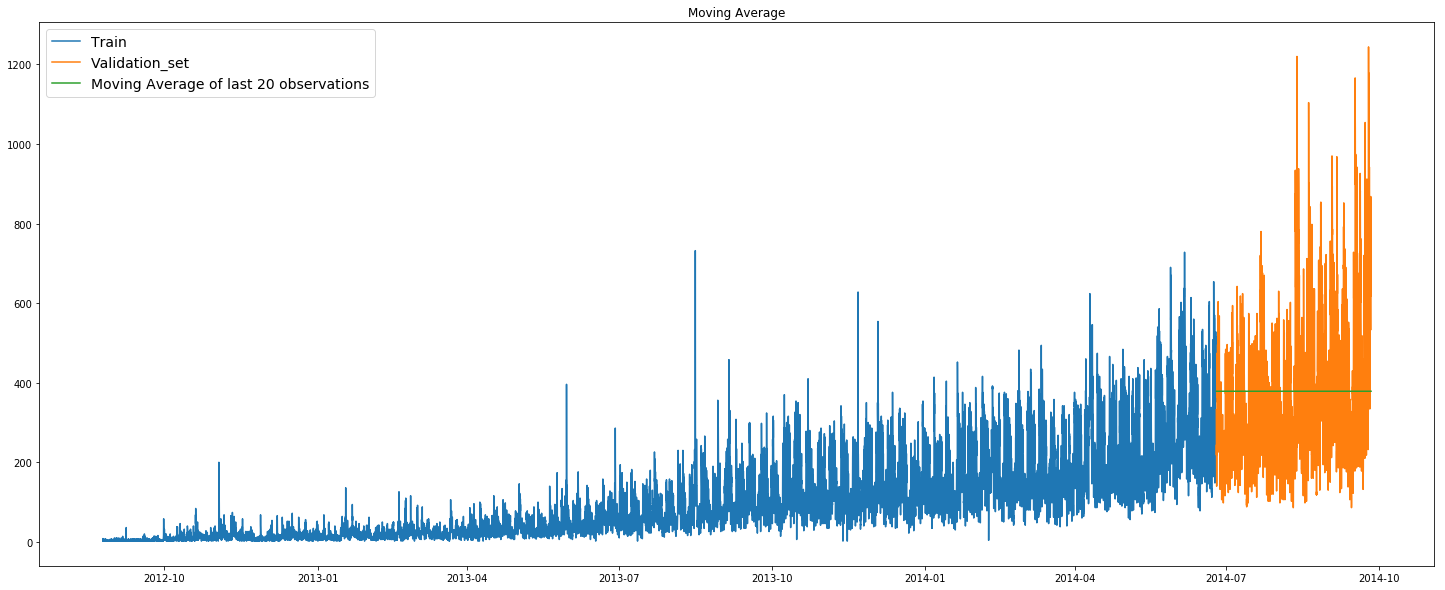

186.67900919256638

In [34]:

#Average of last 20 observations.
y_hat_avg['Moving Average of last 20 observations'] = Train_set.Count.rolling(20).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation_set')
plt.plot(y_hat_avg['Moving Average of last 20 observations'],label = 'Moving Average of last 20 observations')
plt.legend(loc = 'best',fontsize = 14)
plt.title('Moving Average')
plt.show()

rms2 = sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 20 observations']))
rms2

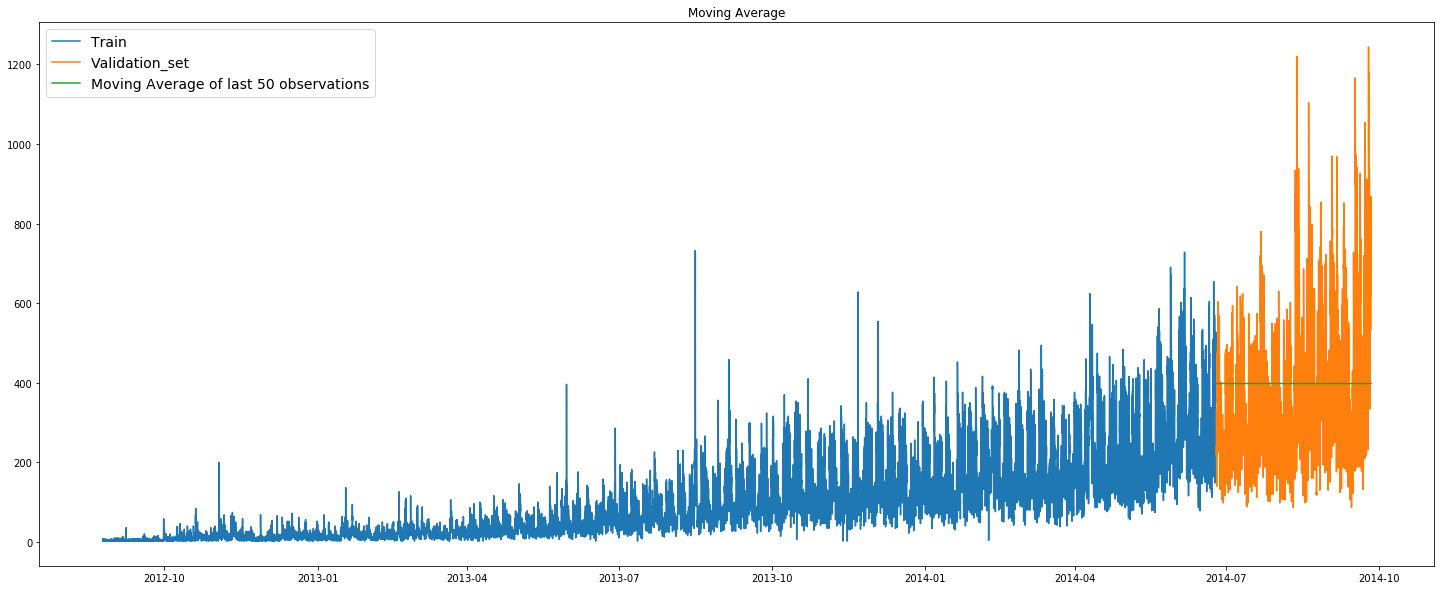

186.5773761711873

In [35]:
#Average of last 50 observations.
y_hat_avg['Moving Average of last 50 observations'] = Train_set.Count.rolling(50).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(Train_set.Count,label = 'Train')
plt.plot(Validation_set.Count,label = 'Validation_set')
plt.plot(y_hat_avg['Moving Average of last 50 observations'],label = 'Moving Average of last 50 observations')
plt.legend(loc = 'best',fontsize = 14)
plt.title('Moving Average')
plt.show()

rms3 = sqrt(mean_squared_error(Validation_set.Count,y_hat_avg['Moving Average of last 50 observations']))
rms3